### Plot convergence graphs for all inversions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mcolors

# Change these inputs  
parameter_file = 'Parameter_List_Adjoint_tutorial_Set_4.csv'
in_filename = 'output_adjoint_NK.csv'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line:
            if line:
                out.write(line)

# Find iteration limits from parameter file
iteration_limits = []
initial_radius = []
radius_growing_rate = []
radius_shrinking_rate_negative_rho= []
radius_shrinking_rate_positive_rho= []
radius_shrinking_threshold = []
radius_growing_threshold = []
with open(parameter_file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if row[0]:
            if line_count == 0:
                line_count += 1
            else:
                iteration_limits.append(int(row[1]))
                initial_radius.append(float(row[2]))
                radius_growing_rate.append(float(row[3]))
                radius_shrinking_rate_negative_rho.append(float(row[4]))
                radius_shrinking_rate_positive_rho.append(float(row[5]))
                radius_shrinking_threshold.append(float(row[6]))
                radius_growing_threshold.append(float(row[7]))

# Get fvals and grads
fval = []
grad = []
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# print(f'gradients: {grad} \n fvals: {fval} \n fval+grad: {fval_plus_grad}')     

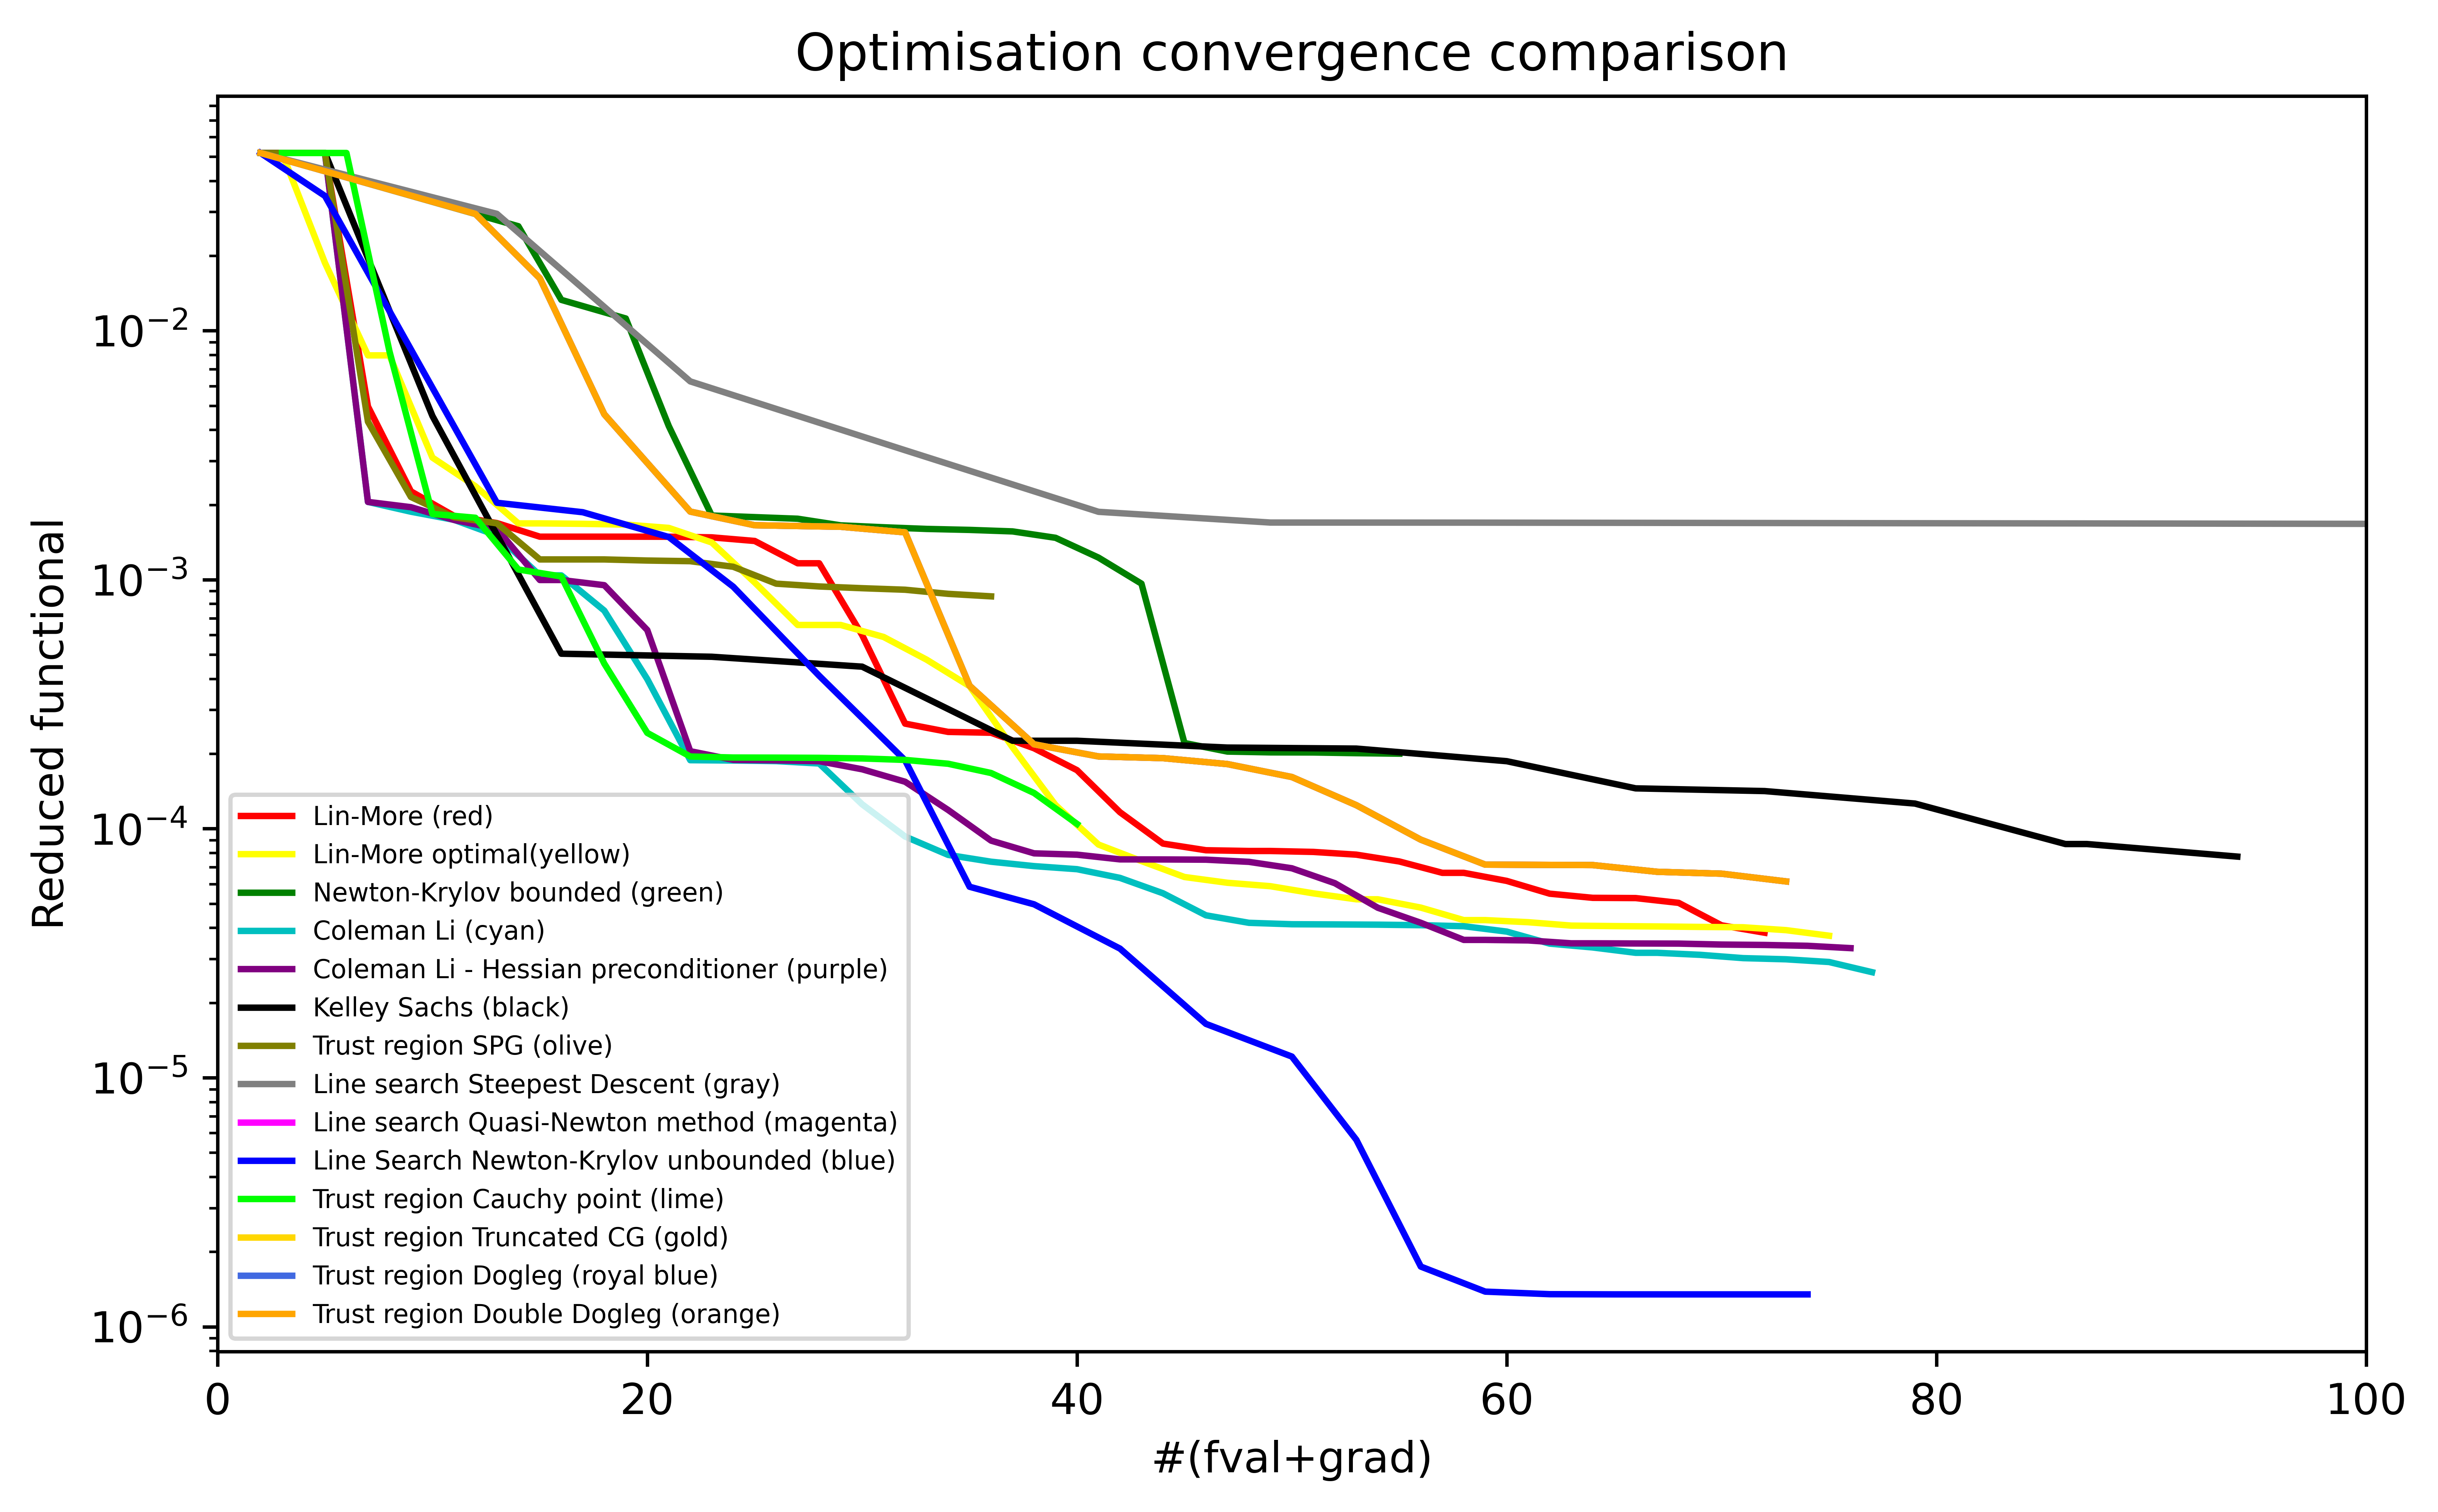

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mcolors


maxi = []

# Lin More reading start--------------------------------------------------------------------------------------------------------------------------------

# Change these inputs
in_filename = 'output_adjoint.csv'
filename = 'functional.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# # Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.figure(figsize=(8,5), dpi=800)
plt.plot(fval_plus_grad, list, label='Lin-More (red)', color = 'r')

# Lin More reading end----------------------------------------------------------------------------------------------------------------------------------

# Lin More optimal reading start------------------------------------------------------------------------------------------------------------------------

# Change these inputs
in_filename = 'output_adjoint_LM_opt.csv'
filename = 'functional_LM_opt.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# # Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Lin-More optimal(yellow)', color = 'yellow')

# Lin More reading end----------------------------------------------------------------------------------------------------------------------------------


# Newton Krylov bounded reading start-------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_NK_bounded.csv'
filename = 'functional_NK_bounded.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Newton-Krylov bounded (green)', color = 'g')

# Newton Krylov bounded reading end---------------------------------------------------------------------------------------------------------------------

# Coleman Li reading start------------------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_CL.csv'
filename = 'functional_CL.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Coleman Li (cyan)', color = 'c')

# Coleman Li reading end--------------------------------------------------------------------------------------------------------------------------------

# Coleman Li Hessian preconditioner reading start-------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_CL_Hess.csv'
filename = 'functional_CL_Hess.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Coleman Li - Hessian preconditioner (purple)', color = 'purple')

# Coleman Li Hessian preconditioner reading end---------------------------------------------------------------------------------------------------------


# # Interior Point reading start------------------------------------------------------------------------------------------------------------------------


# # Change these inputs
# in_filename = 'output_adjoint_IPA.csv'
# filename = 'functional_IPA.txt'

# out_filename = 'final_'+ in_filename

# # We open the source file and get its lines
# with open(in_filename, 'r') as inp:
#     lines = inp.readlines()

# # We open the target file in write-mode
# with open(out_filename, 'w') as out:
#     # We go line by line writing in the target file
#     # if the original line does not include the
#     # strings 'py-board' or 'coffee'
#     for line in lines:
#         if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
#             if line:
#                 out.write(line)

# # Get fvals and grads
# fval = []
# grad = []
# list=[] # Create an empty list for storing the functional values
# with open(out_filename) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if any(field.strip() for field in row):
#             line_count= line_count+1
#             column=0
#             for t in row[0].split():
#                 try:
#                     column = column + 1
#                     if column == 7:
#                         grad.append(float(t))
#                     elif column == 6:
#                         fval.append(float(t))
#                     elif column == 2:
#                         list.append(float(t))
#                 except ValueError:
#                     pass
# fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# max1 = fval_plus_grad[-1]
# maxi.append(max1)
# # Open the file in read mode
# # with open(filename, 'r') as file: 
# #     # Read lines from the file 
# #     lines = file.readlines() 
# #     # Convert the lines to numbers 
# #     numbers = [float(line.strip()) for line in lines] 
# #     list.append(numbers)

# plt.plot(fval_plus_grad, list, label='Interior Point (magenta)', color = 'm')

# # Interior Point reading end----------------------------------------------------------------------------------------------------------------------------


# Kelley Sachs reading start----------------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_KS.csv'
filename = 'functional_KS.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Kelley Sachs (black)', color = 'k')

# Kelley Sachs reading end------------------------------------------------------------------------------------------------------------------------------


# # Moreau Yosida reading start---------------------------------------------------------------------------------------------------------------------------


# # Change these inputs
# in_filename = 'output_adjoint_MY.csv'
# filename = 'functional_MY.txt'

# out_filename = 'final_'+ in_filename

# # We open the source file and get its lines
# with open(in_filename, 'r') as inp:
#     lines = inp.readlines()

# # We open the target file in write-mode
# with open(out_filename, 'w') as out:
#     # We go line by line writing in the target file
#     # if the original line does not include the
#     # strings 'py-board' or 'coffee'
#     for line in lines:
#         if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
#             if line:
#                 out.write(line)

# # Get fvals and grads
# fval = []
# grad = []
# list=[] # Create an empty list for storing the functional values
# with open(out_filename) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if any(field.strip() for field in row):
#             line_count= line_count+1
#             column=0
#             for t in row[0].split():
#                 try:
#                     column = column + 1
#                     if column == 7:
#                         grad.append(float(t))
#                     elif column == 6:
#                         fval.append(float(t))
#                     elif column == 2:
#                         list.append(float(t))
#                 except ValueError:
#                     pass
# fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# max1 = fval_plus_grad[-1]
# maxi.append(max1)
# # Open the file in read mode
# # with open(filename, 'r') as file: 
# #     # Read lines from the file 
# #     lines = file.readlines() 
# #     # Convert the lines to numbers 
# #     numbers = [float(line.strip()) for line in lines] 
# #     list.append(numbers)

# plt.plot(fval_plus_grad, list, label='Moreau Yosida (orange)', color = 'orange')

# # Moreau Yosida reading end-----------------------------------------------------------------------------------------------------------------------------


# # Primal Dual Active Set reading start------------------------------------------------------------------------------------------------------------------


# # Change these inputs
# in_filename = 'output_adjoint_PDAS.csv'
# filename = 'functional_PDAS.txt'

# out_filename = 'final_'+ in_filename

# # We open the source file and get its lines
# with open(in_filename, 'r') as inp:
#     lines = inp.readlines()

# # We open the target file in write-mode
# with open(out_filename, 'w') as out:
#     # We go line by line writing in the target file
#     # if the original line does not include the
#     # strings 'py-board' or 'coffee'
#     for line in lines:
#         if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
#             if line:
#                 out.write(line)

# # Get fvals and grads
# fval = []
# grad = []
# list=[] # Create an empty list for storing the functional values
# with open(out_filename) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if any(field.strip() for field in row):
#             line_count= line_count+1
#             column=0
#             for t in row[0].split():
#                 try:
#                     column = column + 1
#                     if column == 7:
#                         grad.append(float(t))
#                     elif column == 6:
#                         fval.append(float(t))
#                     elif column == 2:
#                         list.append(float(t))
#                 except ValueError:
#                     pass
# fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# max1 = fval_plus_grad[-1]
# maxi.append(max1)
# # Open the file in read mode
# # with open(filename, 'r') as file: 
# #     # Read lines from the file 
# #     lines = file.readlines() 
# #     # Convert the lines to numbers 
# #     numbers = [float(line.strip()) for line in lines] 
# #     list.append(numbers)

# plt.plot(fval_plus_grad, list, label='Primal Dual Active Set (gray)', color = 'gray')

# # Primal Dual Active Set reading end--------------------------------------------------------------------------------------------------------------------


# Trust Region SPG reading start------------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_TSPG.csv'
filename = 'functional_TSPG.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Trust region SPG (olive)', color = 'olive')

# Trust Region SPG reading end--------------------------------------------------------------------------------------------------------------------------

# # Spectral gradient reading start------------------------------------------------------------------------------------------------------------------------


# # Change these inputs
# in_filename = 'output_adjoint_SG.csv'
# filename = 'functional_SG.txt'

# out_filename = 'final_'+ in_filename

# # We open the source file and get its lines
# with open(in_filename, 'r') as inp:
#     lines = inp.readlines()

# # We open the target file in write-mode
# with open(out_filename, 'w') as out:
#     # We go line by line writing in the target file
#     # if the original line does not include the
#     # strings 'py-board' or 'coffee'
#     for line in lines:
#         if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
#             if line:
#                 out.write(line)

# # Get fvals and grads
# fval = []
# grad = []
# list=[] # Create an empty list for storing the functional values
# with open(out_filename) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if any(field.strip() for field in row):
#             line_count= line_count+1
#             column=0
#             for t in row[0].split():
#                 try:
#                     column = column + 1
#                     if column == 7:
#                         grad.append(float(t))
#                     elif column == 6:
#                         fval.append(float(t))
#                     elif column == 2:
#                         list.append(float(t))
#                 except ValueError:
#                     pass
# fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# max1 = fval_plus_grad[-1]
# maxi.append(max1)
# # Open the file in read mode
# # with open(filename, 'r') as file: 
# #     # Read lines from the file 
# #     lines = file.readlines() 
# #     # Convert the lines to numbers 
# #     numbers = [float(line.strip()) for line in lines] 
# #     list.append(numbers)

# plt.plot(fval_plus_grad, list, label='Spectral Gradient (purple)', color = 'purple')

# # Spectral gradient reading end-------------------------------------------------------------------------------------------------------------------------

# Line-Search Steepest descent reading start------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_LS_SD.csv'
filename = 'functional_LS_SD.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Line search Steepest Descent (gray)', color = 'gray')

# Line-Search Steepest descent reading end--------------------------------------------------------------------------------------------------------------


# # Line-Search conjugate gradient reading start----------------------------------------------------------------------------------------------------------


# # Change these inputs
# in_filename = 'output_adjoint_LS_NCG.csv'
# filename = 'functional_LS_NCG.txt'

# out_filename = 'final_'+ in_filename

# # We open the source file and get its lines
# with open(in_filename, 'r') as inp:
#     lines = inp.readlines()

# # We open the target file in write-mode
# with open(out_filename, 'w') as out:
#     # We go line by line writing in the target file
#     # if the original line does not include the
#     # strings 'py-board' or 'coffee'
#     for line in lines:
#         if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
#             if line:
#                 out.write(line)

# # Get fvals and grads
# fval = []
# grad = []
# list=[] # Create an empty list for storing the functional values
# with open(out_filename) as csv_file:
#     csv_reader = csv.reader(csv_file, delimiter=',')
#     line_count = 0
#     for row in csv_reader:
#         if any(field.strip() for field in row):
#             line_count= line_count+1
#             column=0
#             for t in row[0].split():
#                 try:
#                     column = column + 1
#                     if column == 7:
#                         grad.append(float(t))
#                     elif column == 6:
#                         fval.append(float(t))
#                     elif column == 2:
#                         list.append(float(t))
#                 except ValueError:
#                     pass
# fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
# max1 = fval_plus_grad[-1]
# maxi.append(max1)
# # Open the file in read mode
# # with open(filename, 'r') as file: 
# #     # Read lines from the file 
# #     lines = file.readlines() 
# #     # Convert the lines to numbers 
# #     numbers = [float(line.strip()) for line in lines] 
# #     list.append(numbers)

# plt.plot(fval_plus_grad, list, label='Line search Non-linear Conjugate Gradient (orange)', color = 'orange')

# # Line-Search conjugate gradient reading end------------------------------------------------------------------------------------------------------------


# Line-Search Quasi-Newton methods reading start--------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_LS_QNM.csv'
filename = 'functional_LS_QNM.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Line search Quasi-Newton method (magenta)', color = 'magenta')

# Line-Search Quasi-Newton methods reading end----------------------------------------------------------------------------------------------------------


# Newton Krylov unbounded reading start---------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_NK.csv'
filename = 'functional_NK.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Line Search Newton-Krylov unbounded (blue)', color = 'b')

# Newton Krylov unbounded reading end-------------------------------------------------------------------------------------------------------------------

# Trust region Cauchy point reading start---------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_TR_CP.csv'
filename = 'functional_TR_CP.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Trust region Cauchy point (lime)', color = 'lime')

# Trust region Cauchy point reading end-----------------------------------------------------------------------------------------------------------------

# Trust region Truncated CG reading start---------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_TR_TCG.csv'
filename = 'functional_TR_TCG.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Trust region Truncated CG (gold)', color = 'gold')

# Trust region Truncated CG reading end-----------------------------------------------------------------------------------------------------------------

# Trust region Dogleg reading start---------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_TR_DL.csv'
filename = 'functional_TR_DL.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Trust region Dogleg (royal blue)', color = 'royalblue')

# Trust region Dogleg reading end-----------------------------------------------------------------------------------------------------------------------

# Trust region Double Dogleg reading start--------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_TR_DDL.csv'
filename = 'functional_TR_DDL.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Trust region Double Dogleg (orange)', color = 'orange')

# Trust region Double Dogleg reading end----------------------------------------------------------------------------------------------------------------



maxii = max(maxi)
plt.xlabel("#(fval+grad)")
plt.ylabel("Reduced functional")
plt.yscale("log")
# plt.xticks(range(0,100))
plt.xlim(0,100)
plt.legend(loc=3, prop={'size': 6})
plt.title('Optimisation convergence comparison')
plt.tight_layout()

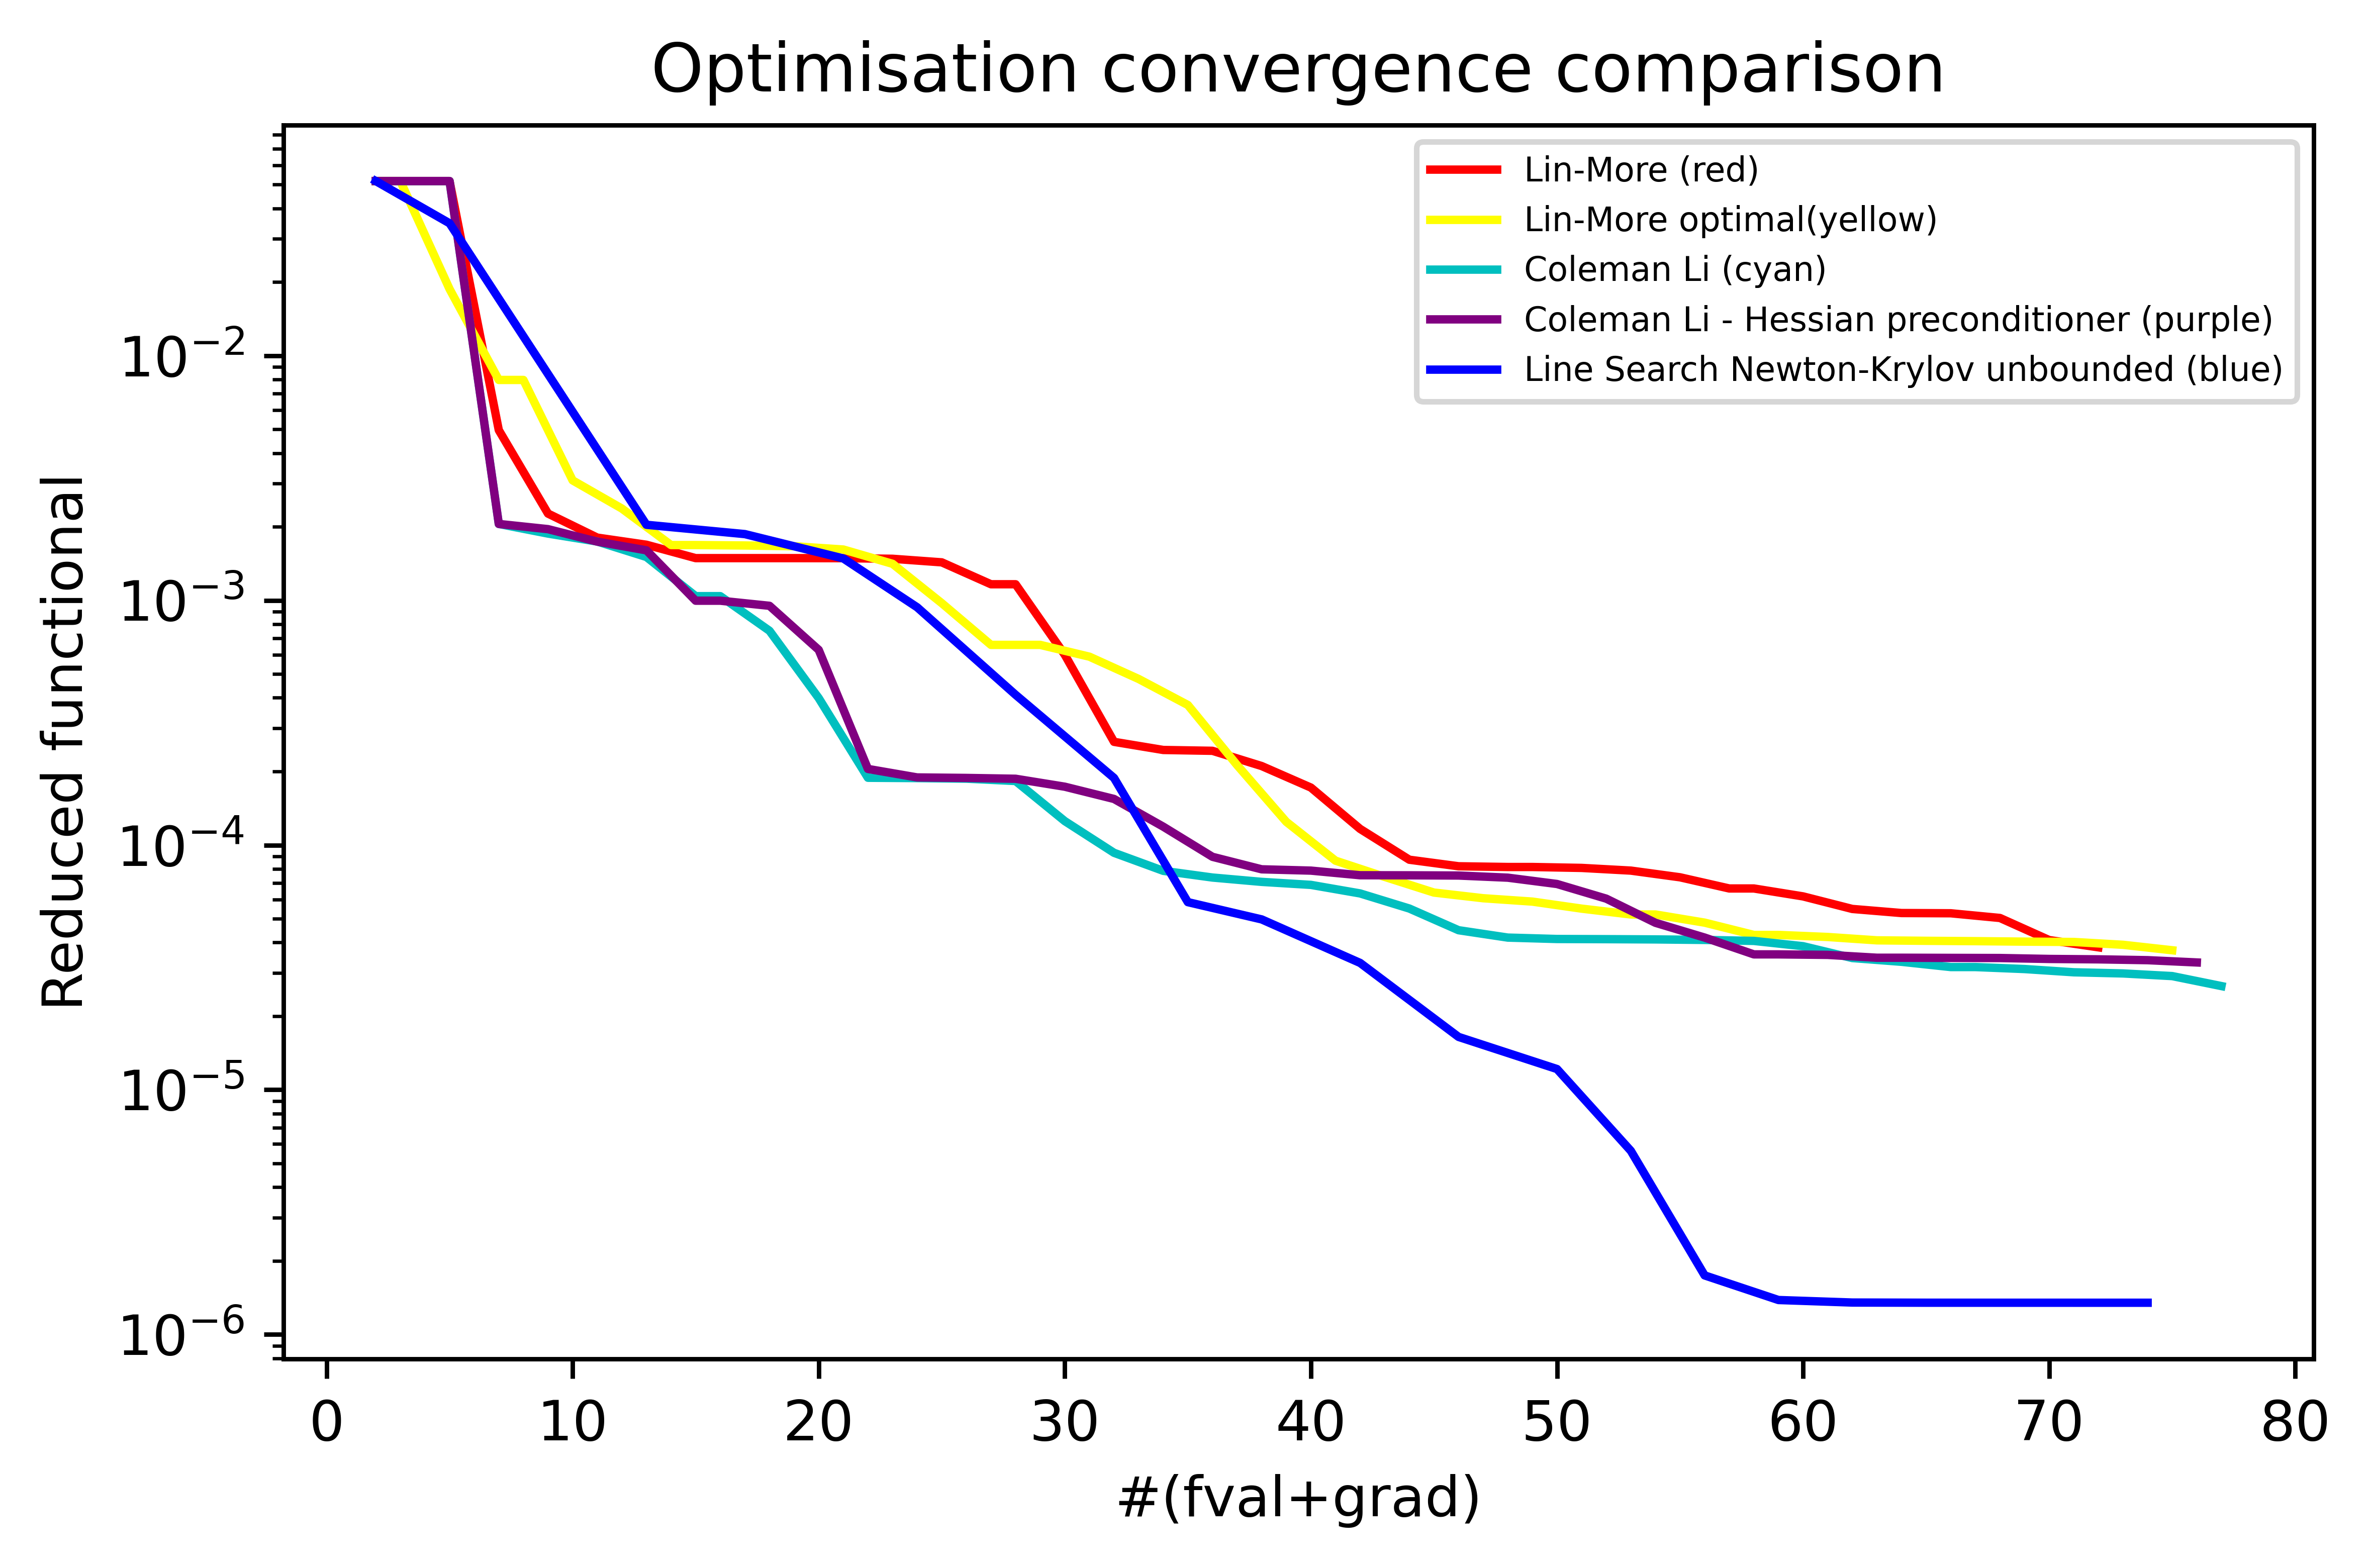

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.colors as mcolors


maxi = []

# Lin More reading start--------------------------------------------------------------------------------------------------------------------------------

# Change these inputs
in_filename = 'output_adjoint.csv'
filename = 'functional.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# # Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.figure(figsize=(6,4), dpi=800)
plt.plot(fval_plus_grad, list, label='Lin-More (red)', color = 'r')

# Lin More reading end----------------------------------------------------------------------------------------------------------------------------------

# Lin More optimal reading start------------------------------------------------------------------------------------------------------------------------

# Change these inputs
in_filename = 'output_adjoint_LM_opt.csv'
filename = 'functional_LM_opt.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# # Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Lin-More optimal(yellow)', color = 'yellow')

# Lin More reading end----------------------------------------------------------------------------------------------------------------------------------

# Coleman Li reading start------------------------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_CL.csv'
filename = 'functional_CL.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Coleman Li (cyan)', color = 'c')

# Coleman Li reading end--------------------------------------------------------------------------------------------------------------------------------

# Coleman Li Hessian preconditioner reading start-------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_CL_Hess.csv'
filename = 'functional_CL_Hess.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Hessian' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max1 = fval_plus_grad[-1]
maxi.append(max1)
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Coleman Li - Hessian preconditioner (purple)', color = 'purple')

# Coleman Li Hessian preconditioner reading end---------------------------------------------------------------------------------------------------------


# Newton Krylov unbounded reading start---------------------------------------------------------------------------------------------------------------


# Change these inputs
in_filename = 'output_adjoint_NK.csv'
filename = 'functional_NK.txt'

out_filename = 'final_'+ in_filename

# We open the source file and get its lines
with open(in_filename, 'r') as inp:
    lines = inp.readlines()

# We open the target file in write-mode
with open(out_filename, 'w') as out:
    # We go line by line writing in the target file
    # if the original line does not include the
    # strings 'py-board' or 'coffee'
    for line in lines:
        if not 'SNES' in line and not 'Linear' in line and not 'Lin-More' in line and not 'Optimization' in line and not 'iter' in line and not 'Processed' in line and not 'Terminal' in line and not '<class' in line and not 'Method' in line and not 'Line' in line and not 'Interior' in line and not 'Subproblem' in line and not 'Nonlinear' in line and not 'Gradient' in line:
            if line:
                out.write(line)

# Get fvals and grads
fval = []
grad = []
list=[] # Create an empty list for storing the functional values
with open(out_filename) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if any(field.strip() for field in row):
            line_count= line_count+1
            column=0
            for t in row[0].split():
                try:
                    column = column + 1
                    if column == 7:
                        grad.append(float(t))
                    elif column == 6:
                        fval.append(float(t))
                    elif column == 2:
                        list.append(float(t))
                except ValueError:
                    pass
fval_plus_grad = [sum(n) for n in zip(*[fval, grad])]
max2 = fval_plus_grad[-1]
# Open the file in read mode
# with open(filename, 'r') as file: 
#     # Read lines from the file 
#     lines = file.readlines() 
#     # Convert the lines to numbers 
#     numbers = [float(line.strip()) for line in lines] 
#     list.append(numbers)

plt.plot(fval_plus_grad, list, label='Line Search Newton-Krylov unbounded (blue)', color = 'b')

# Newton Krylov unbounded reading end-------------------------------------------------------------------------------------------------------------------


maxii = max(maxi)
plt.xlabel("#(fval+grad)")
plt.ylabel("Reduced functional")
plt.yscale("log")
# plt.xticks(range(0,100))
# plt.xlim(0, 15)
plt.legend(loc=1, prop={'size': 6})
plt.title('Optimisation convergence comparison')
plt.tight_layout()

In [ ]:
# Change these inputs
parameter_set_name = 'Set 4'
functional_set = './functionals/functional_Set_4_'

list=[] # Create an empty list for storing the functional values
list_no = len(iteration_limits) # Total parameter sets
index = 0 # Index for storing fval+grad sequence
x_values = [] # empty list for storing the fval+grad for corresponding functional values
# Read functional values from files
for i in range(list_no):
    filename = functional_set+str(i+1)+'.txt'
    # Open the file in read mode
    with open(filename, 'r') as file: 
        # Read lines from the file 
        lines = file.readlines() 
    # Convert the lines to numbers 
    numbers = [float(line.strip()) for line in lines] 
    list.append(numbers)
    fval_plus_grad_values = fval_plus_grad[index:index + len(numbers)]
    index = index + len(numbers)
    x_values.append(fval_plus_grad_values)

# Plot the list of functional values
plt.figure(figsize=(8,4), dpi=800)
colors = mcolors.XKCD_COLORS
names = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
step = int(len(names)/list_no)
for i in range(list_no):
    # plt.plot(list[i], label='Parameter Set: '+ str(i+1), color=(random.random(), random.random(), random.random()))
    label = '#Iter=' + str (iteration_limits[i]) + ', ' + 'R=' + str (initial_radius[i]) + ', ' + 'Rg=' + str (radius_growing_rate[i]) + ', ' \
    + 'Rs$(-\\rho)$=' + str (radius_shrinking_rate_negative_rho[i]) + ', ' + 'Rs$(+\\rho)$=' + str (radius_shrinking_rate_positive_rho[i]) + ', ' \
    + 'Rs_thresh=' + str (radius_shrinking_threshold[i]) + ', ' + 'Rg_thresh=' + str (radius_growing_threshold[i])
    plt.plot(x_values[i], list[i], label=label, color = colors[names[i*step]])
    # plt.plot(x_values[i], list[i])
    
plt.xlabel("#(fval+grad)")
plt.ylabel("Reduced functional")
plt.yscale("log")
plt.xticks(range(0,20))
plt.legend(loc=1, prop={'size': 6})
plt.title('Optimisation convergence for ' + parameter_set_name)
plt.tight_layout()